## **Bibliotecas**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import MaxNLocator, FuncFormatter

# Configurações visuais
sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)

## **Carregamento dos Dados**

In [2]:
df = pd.read_csv('dados_projeto_evasao_treino.csv')

# Corrigir nomes de colunas com espaços
df.columns = df.columns.str.strip()

# Verificar colunas disponíveis
print("Colunas disponíveis:", df.columns.tolist())

# Remover coluna 'Unnamed: 0' se existir
if 'Unnamed: 0' in df.columns:
    df.drop(columns=['Unnamed: 0'], inplace=True)

# Visualizar os primeiros registros
df.head()

Colunas disponíveis: ['', 'ds_cidade_usuario', 'ts_primeiro_acesso', 'ts_ultimo_acesso', 'nr_dias_desde_primeiro_acesso', 'nr_dias_desde_ultimo_acesso', 'nr_atividades_sinalizadas', 'nr_atividades_mapeadas', 'nr_discussoes_forum_postadas', 'nr_questionarios_abandonados', 'nr_questionarios_finalizados', 'vl_medio_tempo_questionario', 'vl_medio_tempo_questionario_avaliado', 'vl_desempenho_questionario', 'nr_intervalos_uso', 'nr_dias_uso', 'vl_medio_atividade_diaria', 'vl_engajamento_usuario_por_intervalo', 'vl_engajamento_usuario_intradia', 'nr_interacoes_usuario', 'nr_dias_engajamento_discussao', 'nr_dias_engajamento_questionario', 'nr_engajamento_discussao', 'nr_engajamento_questionario', 'nr_questoes_respondidas', 'nr_questoes_corretas', 'nr_questoes_erradas', 'nr_questoes_parciais', 'vl_desempenho_usuario', 'vl_media_questoes_por_dia', 'vl_engajamento_notas', 'nr_itens_avaliados', 'nr_itens_nao_respondidos', 'vl_media_notas', 'nr_submissoes_codigo', 'vl_media_submissoes_codigo', 'vl_

,,ds_cidade_usuario,ts_primeiro_acesso,ts_ultimo_acesso,nr_dias_desde_primeiro_acesso,nr_dias_desde_ultimo_acesso,nr_atividades_sinalizadas,nr_atividades_mapeadas,nr_discussoes_forum_postadas,nr_questionarios_abandonados,...,nr_questoes_parciais,vl_desempenho_usuario,vl_media_questoes_por_dia,vl_engajamento_notas,nr_itens_avaliados,nr_itens_nao_respondidos,vl_media_notas,nr_submissoes_codigo,vl_media_submissoes_codigo,vl_submissoes_por_dias_ativos
0,1,Campinas,0,0,19612,19612,0,0,0,0,...,0,,,,0,0,,0,,
1,3,Campinas,0,0,19612,19612,0,0,0,0,...,0,,,,0,0,,0,,
2,4,Campinas,0,0,19612,19612,0,0,0,0,...,0,,,,0,0,,0,,
3,5,,1692744534,1693928454,20,6,0,4,0,0,...,0,1.0,,,1,62,1.0,0,,
4,6,Campinas,0,0,19612,19612,0,0,0,0,...,0,,,,0,0,,0,,


## **Análise Exploratória dos Dados (EDA)**
Nesta seção exploramos estatísticas e padrões nos dados.

In [3]:
# Converter colunas object para float (corrigir dados numéricos como string)
object_cols = df.select_dtypes(include='object').columns
for col in object_cols:
    df[col] = df[col].astype(str).str.strip().replace('', pd.NA)
    df[col] = pd.to_numeric(df[col], errors='coerce')

In [4]:
# Estatísticas descritivas das variáveis numéricas
df.describe().T

,count,mean,std,min,25%,50%,75%,max
,400.0,2.480275e+02,1.405804e+02,1.000000,131.500000,2.455000e+02,3.672500e+02,4.990000e+02
ds_cidade_usuario,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ts_primeiro_acesso,400.0,8.647958e+08,8.445285e+08,0.000000,0.000000,1.661414e+09,1.692747e+09,1.694097e+09
ts_ultimo_acesso,400.0,8.664560e+08,8.461345e+08,0.000000,0.000000,1.666093e+09,1.693434e+09,1.694471e+09
nr_dias_desde_primeiro_acesso,400.0,9.602667e+03,9.774754e+03,4.000000,20.000000,3.825000e+02,1.961200e+04,1.961200e+04
nr_dias_desde_ultimo_acesso,400.0,9.583465e+03,9.793330e+03,0.000000,12.000000,3.280000e+02,1.961200e+04,1.961200e+04
nr_atividades_sinalizadas,400.0,1.775000e-01,1.224640e+00,0.000000,0.000000,0.000000e+00,0.000000e+00,1.100000e+01
nr_atividades_mapeadas,400.0,9.475000e-01,5.036184e+00,0.000000,0.000000,0.000000e+00,0.000000e+00,4.800000e+01
nr_discussoes_forum_postadas,400.0,3.450000e-01,2.840095e+00,0.000000,0.000000,0.000000e+00,0.000000e+00,3.900000e+01
nr_questionarios_abandonados,400.0,3.500000e-02,2.719557e-01,0.000000,0.000000,0.000000e+00,0.000000e+00,3.000000e+00


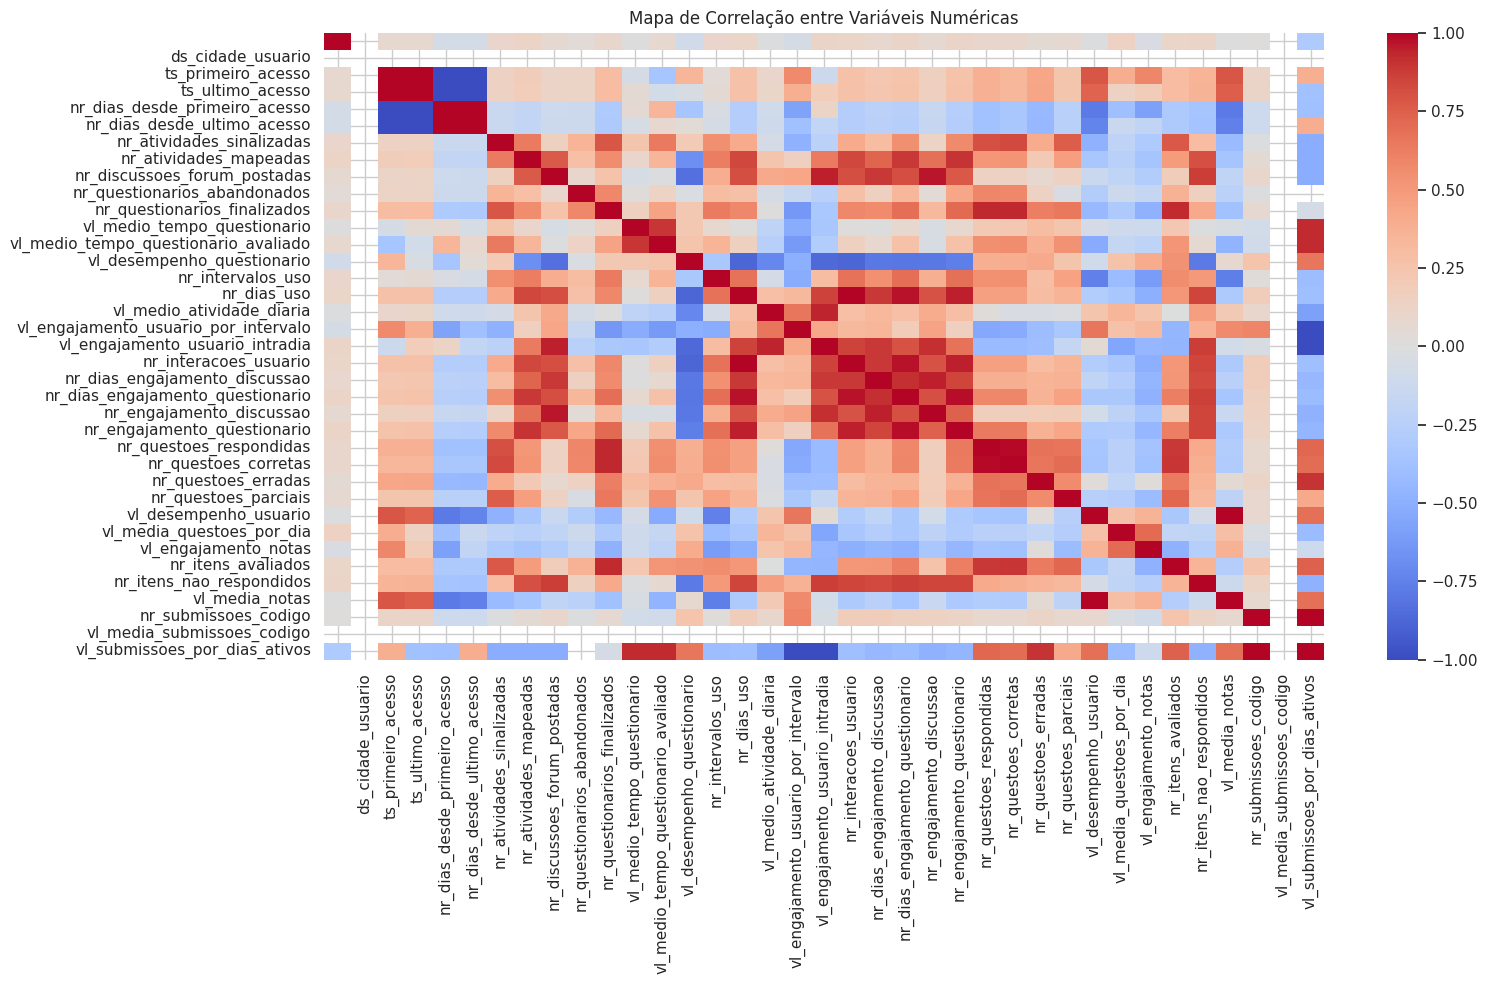

In [5]:
# Mapa de correlação entre variáveis numéricas
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(16, 10))
sns.heatmap(df.corr(numeric_only=True), annot=False, cmap='coolwarm', center=0)
plt.title('Mapa de Correlação entre Variáveis Numéricas')
plt.tight_layout()
plt.show()

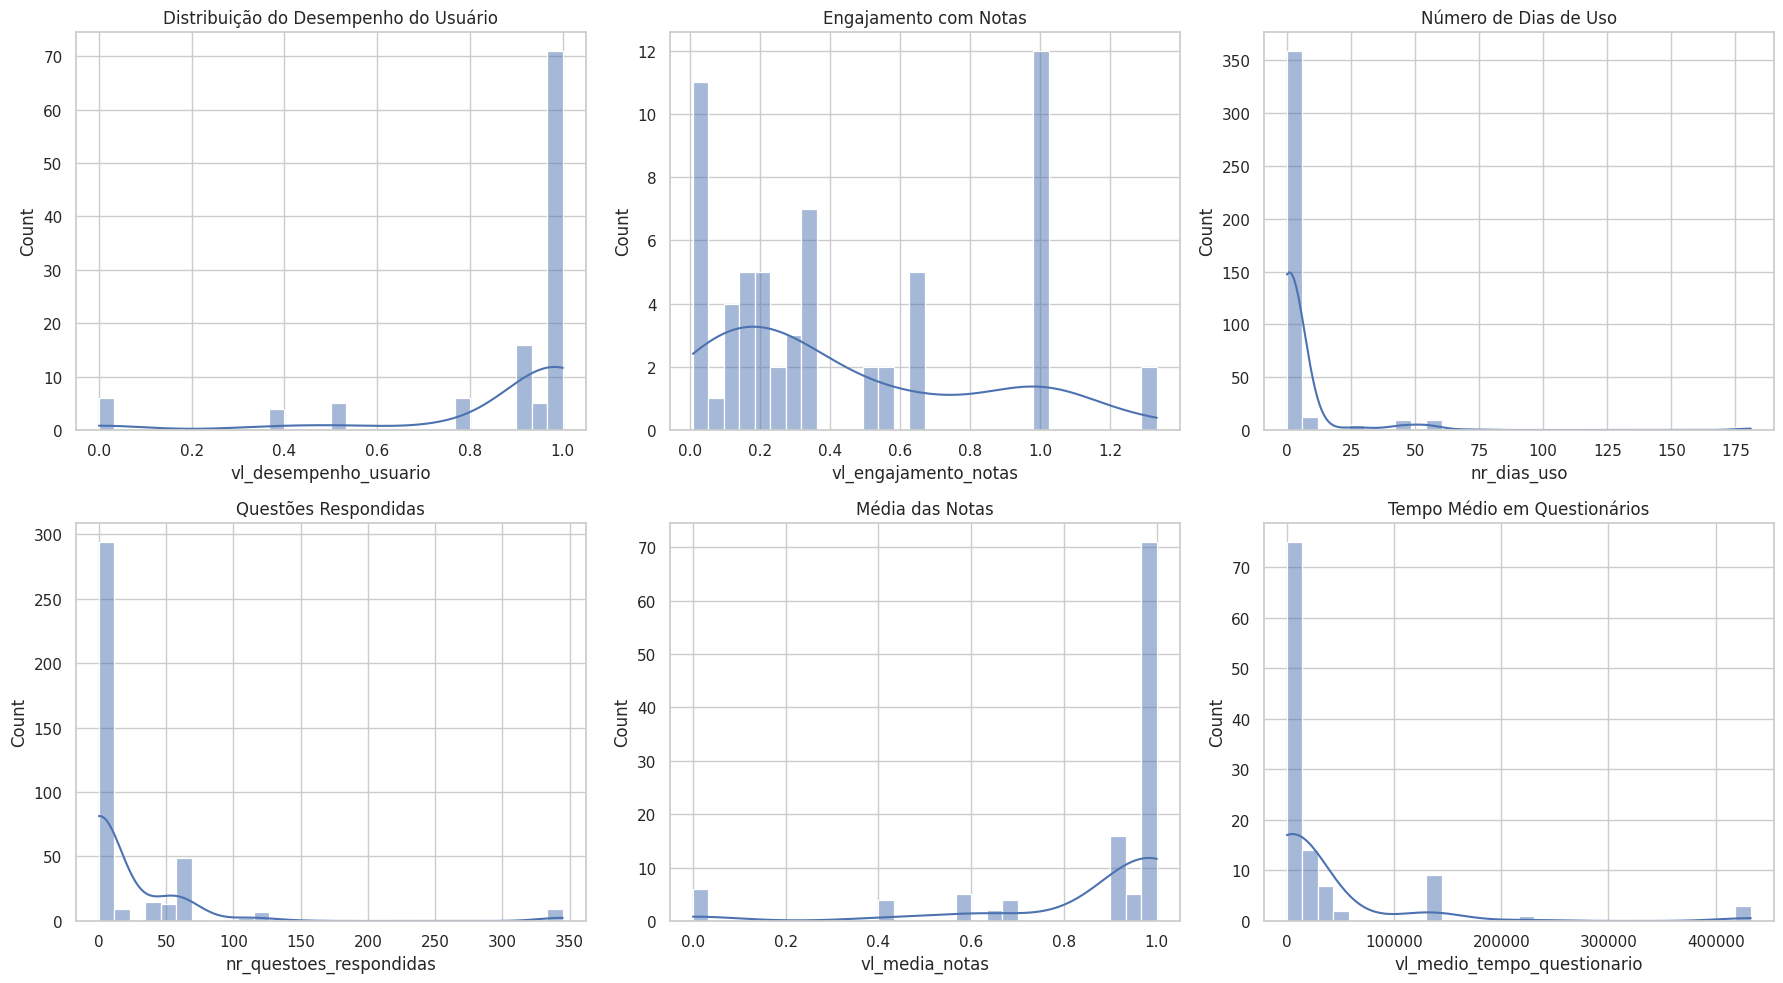

In [6]:
# Gráficos de distribuição de variáveis importantes
fig, axes = plt.subplots(2, 3, figsize=(18, 10))
sns.histplot(df['vl_desempenho_usuario'], bins=30, kde=True, ax=axes[0, 0])
axes[0, 0].set_title('Distribuição do Desempenho do Usuário')
sns.histplot(df['vl_engajamento_notas'], bins=30, kde=True, ax=axes[0, 1])
axes[0, 1].set_title('Engajamento com Notas')
sns.histplot(df['nr_dias_uso'], bins=30, kde=True, ax=axes[0, 2])
axes[0, 2].set_title('Número de Dias de Uso')
sns.histplot(df['nr_questoes_respondidas'], bins=30, kde=True, ax=axes[1, 0])
axes[1, 0].set_title('Questões Respondidas')
sns.histplot(df['vl_media_notas'], bins=30, kde=True, ax=axes[1, 1])
axes[1, 1].set_title('Média das Notas')
sns.histplot(df['vl_medio_tempo_questionario'], bins=30, kde=True, ax=axes[1, 2])
axes[1, 2].set_title('Tempo Médio em Questionários')
plt.tight_layout()
plt.show()

## **Entendimento Inicial**

In [7]:
# Estrutura do DataFrame
print("Formato:", df.shape)
df.info()

display(df.describe().T)

# Classificação de colunas por prefixo
categoricas = [col for col in df.columns if col.startswith("ds_")]
temporais = [col for col in df.columns if col.startswith("ts_")]
numericas_nr = [col for col in df.columns if col.startswith("nr_")]
numericas_vl = [col for col in df.columns if col.startswith("vl_")]

print("Categóricas:", categoricas)
print("Temporais:", temporais)
print("Numéricas (contagem):", numericas_nr)
print("Numéricas (valores):", numericas_vl)

Formato: (400, 37)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 37 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0                                         400 non-null    int64  
 1   ds_cidade_usuario                     0 non-null      float64
 2   ts_primeiro_acesso                    400 non-null    int64  
 3   ts_ultimo_acesso                      400 non-null    int64  
 4   nr_dias_desde_primeiro_acesso         400 non-null    int64  
 5   nr_dias_desde_ultimo_acesso           400 non-null    int64  
 6   nr_atividades_sinalizadas             400 non-null    int64  
 7   nr_atividades_mapeadas                400 non-null    int64  
 8   nr_discussoes_forum_postadas          400 non-null    int64  
 9   nr_questionarios_abandonados          400 non-null    int64  
 10  nr_questionarios_finalizados          400 non-null    int64  
 11  

,count,mean,std,min,25%,50%,75%,max
,400.0,2.480275e+02,1.405804e+02,1.000000,131.500000,2.455000e+02,3.672500e+02,4.990000e+02
ds_cidade_usuario,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ts_primeiro_acesso,400.0,8.647958e+08,8.445285e+08,0.000000,0.000000,1.661414e+09,1.692747e+09,1.694097e+09
ts_ultimo_acesso,400.0,8.664560e+08,8.461345e+08,0.000000,0.000000,1.666093e+09,1.693434e+09,1.694471e+09
nr_dias_desde_primeiro_acesso,400.0,9.602667e+03,9.774754e+03,4.000000,20.000000,3.825000e+02,1.961200e+04,1.961200e+04
nr_dias_desde_ultimo_acesso,400.0,9.583465e+03,9.793330e+03,0.000000,12.000000,3.280000e+02,1.961200e+04,1.961200e+04
nr_atividades_sinalizadas,400.0,1.775000e-01,1.224640e+00,0.000000,0.000000,0.000000e+00,0.000000e+00,1.100000e+01
nr_atividades_mapeadas,400.0,9.475000e-01,5.036184e+00,0.000000,0.000000,0.000000e+00,0.000000e+00,4.800000e+01
nr_discussoes_forum_postadas,400.0,3.450000e-01,2.840095e+00,0.000000,0.000000,0.000000e+00,0.000000e+00,3.900000e+01
nr_questionarios_abandonados,400.0,3.500000e-02,2.719557e-01,0.000000,0.000000,0.000000e+00,0.000000e+00,3.000000e+00


Categóricas: ['ds_cidade_usuario']
Temporais: ['ts_primeiro_acesso', 'ts_ultimo_acesso']
Numéricas (contagem): ['nr_dias_desde_primeiro_acesso', 'nr_dias_desde_ultimo_acesso', 'nr_atividades_sinalizadas', 'nr_atividades_mapeadas', 'nr_discussoes_forum_postadas', 'nr_questionarios_abandonados', 'nr_questionarios_finalizados', 'nr_intervalos_uso', 'nr_dias_uso', 'nr_interacoes_usuario', 'nr_dias_engajamento_discussao', 'nr_dias_engajamento_questionario', 'nr_engajamento_discussao', 'nr_engajamento_questionario', 'nr_questoes_respondidas', 'nr_questoes_corretas', 'nr_questoes_erradas', 'nr_questoes_parciais', 'nr_itens_avaliados', 'nr_itens_nao_respondidos', 'nr_submissoes_codigo']
Numéricas (valores): ['vl_medio_tempo_questionario', 'vl_medio_tempo_questionario_avaliado', 'vl_desempenho_questionario', 'vl_medio_atividade_diaria', 'vl_engajamento_usuario_por_intervalo', 'vl_engajamento_usuario_intradia', 'vl_desempenho_usuario', 'vl_media_questoes_por_dia', 'vl_engajamento_notas', 'vl_med

## **Valores Ausentes**

,% de Valores Ausentes
ds_cidade_usuario,100.00
vl_media_submissoes_codigo,99.00
vl_submissoes_por_dias_ativos,98.00
vl_desempenho_questionario,93.25
vl_engajamento_usuario_por_intervalo,92.75
vl_engajamento_usuario_intradia,92.75
vl_media_questoes_por_dia,84.75
vl_engajamento_notas,84.75
vl_medio_tempo_questionario_avaliado,73.25
vl_medio_tempo_questionario,72.25


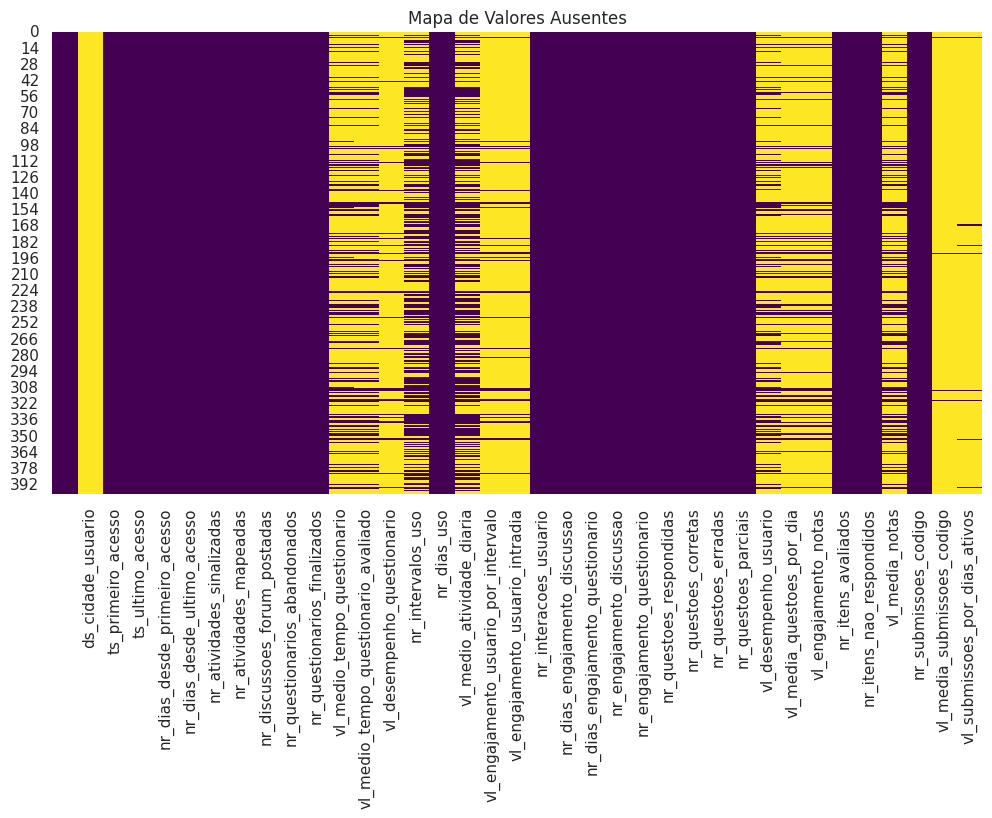

In [8]:
missing = (df.isnull().mean() * 100).sort_values(ascending=False)
missing_df = pd.DataFrame({'% de Valores Ausentes': missing.round(2)})
display(missing_df[missing_df['% de Valores Ausentes'] > 0])
sns.heatmap(df.isnull(), cbar=False, cmap="viridis")
plt.title("Mapa de Valores Ausentes")
plt.show()

## **Conversão de Datas**

In [9]:
df['ts_primeiro_acesso'] = pd.to_datetime(df['ts_primeiro_acesso'], unit='s', errors='coerce')
df['ts_ultimo_acesso'] = pd.to_datetime(df['ts_ultimo_acesso'], unit='s', errors='coerce')
df['tempo_total_participacao'] = (df['ts_ultimo_acesso'] - df['ts_primeiro_acesso']).dt.days

df[['ts_primeiro_acesso', 'ts_ultimo_acesso', 'tempo_total_participacao']].head()

,ts_primeiro_acesso,ts_ultimo_acesso,tempo_total_participacao
0,1970-01-01 00:00:00,1970-01-01 00:00:00,0
1,1970-01-01 00:00:00,1970-01-01 00:00:00,0
2,1970-01-01 00:00:00,1970-01-01 00:00:00,0
3,2023-08-22 22:48:54,2023-09-05 15:40:54,13
4,1970-01-01 00:00:00,1970-01-01 00:00:00,0


## **Relações Entre Variáveis**

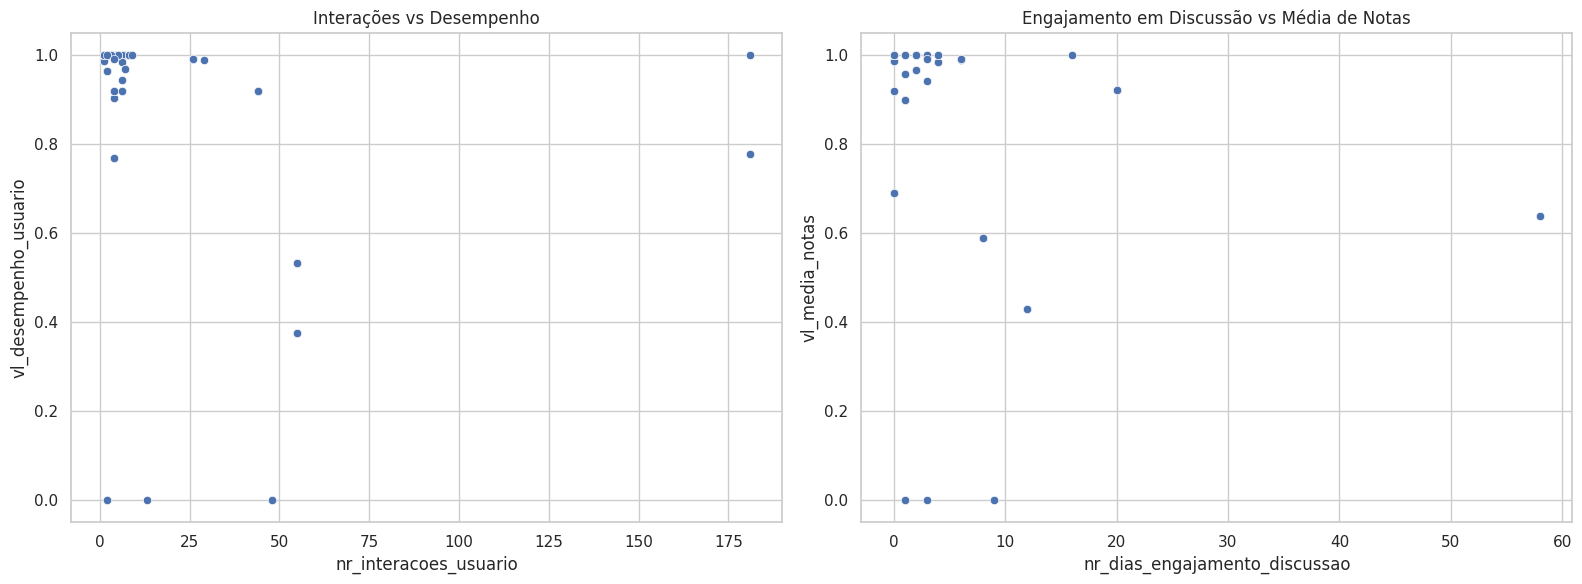

In [10]:
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

sns.scatterplot(data=df, x='nr_interacoes_usuario', y='vl_desempenho_usuario', ax=axes[0])
axes[0].set_title("Interações vs Desempenho")

sns.scatterplot(data=df, x='nr_dias_engajamento_discussao', y='vl_media_notas', ax=axes[1])
axes[1].set_title("Engajamento em Discussão vs Média de Notas")

plt.tight_layout()
plt.show()

## **Pré-processamento dos Dados**
- Remoção de colunas com muitos valores nulos (> 90%)
- Preenchimento de valores faltantes com a mediana
- Conversão de tipos `object` para `float`
- Criação da variável `dias_entre_acessos`
- Remoção de colunas temporais originais (`ts_...`)
- Dataset final sem valores ausentes e pronto para modelagem

In [11]:
# Imputação de colunas com muitos nulos
cols_nulos = [
    'vl_engajamento_usuario_por_intervalo', 'vl_engajamento_usuario_intradia',
    'vl_desempenho_questionario', 'vl_media_questoes_por_dia', 'vl_engajamento_notas',
    'vl_media_notas', 'vl_media_submissoes_codigo', 'vl_submissoes_por_dias_ativos'
]
for col in cols_nulos:
    if col in df.columns:
        df[col] = df[col].fillna(0)

# Codificação de categóricas
df['ds_cidade_usuario'] = df['ds_cidade_usuario'].fillna('desconhecido')
df = pd.get_dummies(df, columns=['ds_cidade_usuario'], drop_first=True)

# Normalização
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
num_cols = df.select_dtypes(include=['int64', 'float64']).columns.drop(['tempo_total_participacao'])
df[num_cols] = scaler.fit_transform(df[num_cols])

## **Exportação do Dataset**

In [ ]:
from google.colab import files

df.to_csv('dados_processados.csv', index=False)
print('Dataset salvo com sucesso!')
files.download('dados_processados.csv')


Dataset salvo com sucesso!


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## 🎯 Criação da Variável-Alvo `evadiu`
A variável foi criada com base em critérios heurísticos comportamentais:

- `nr_dias_uso < 3`
- `nr_questoes_respondidas == 0`
- `vl_desempenho_usuario < 0.1`
- `vl_engajamento_notas == 0`

Se qualquer um desses critérios for atendido, o aluno é classificado como `evadiu = 1`.

In [12]:
# Criar variável-alvo
df['evadiu'] = (
    (df['nr_dias_uso'] < 3) |
    (df['nr_questoes_respondidas'] == 0) |
    (df['vl_desempenho_usuario'] < 0.1) |
    (df['vl_engajamento_notas'] == 0)
).astype(int)

# Ver distribuição
df['evadiu'].value_counts(normalize=True)

,proportion
evadiu,
1,0.995
0,0.005


## 🧪 Separação dos Dados e Escalonamento
Separação em `X` (features) e `y` (alvo), divisão em treino/validação, e aplicação de `StandardScaler`.

In [16]:
# Separar X e y
X = df.drop(columns=['evadiu'])
# Garantir apenas colunas numéricas (evita erro com datetime/object)
X = X.select_dtypes(include=['int64', 'float64'])
y = df['evadiu']

In [15]:
# Garantir que X contenha apenas variáveis numéricas
X = X.select_dtypes(include=['number'])